In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import re
import string
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.tokenize import word_tokenize, TweetTokenizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C://Users//NAVEEN REDDY//OneDrive//Desktop//elonmusk.csv")

In [3]:
data.rename(columns = {'Date Created':'DateCreated'}, inplace = True)

In [4]:
data = data.assign(DateCreated=pd.to_datetime(data.DateCreated))
data.head(3)

,DateCreated,Number of Likes,Source of Tweet,Tweets
0,2022-09-12 05:44:11+00:00,1524,Twitter for iPhone,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...
1,2022-09-12 05:43:02+00:00,19631,Twitter for iPhone,@cb_doge @Tesla @mayemusk Still doing same thi...
2,2022-09-12 04:19:57+00:00,9221,Twitter for iPhone,Looks good to roll out to all Tesla owners wit...


In [5]:
data

,DateCreated,Number of Likes,Source of Tweet,Tweets
0,2022-09-12 05:44:11+00:00,1524,Twitter for iPhone,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...
1,2022-09-12 05:43:02+00:00,19631,Twitter for iPhone,@cb_doge @Tesla @mayemusk Still doing same thi...
2,2022-09-12 04:19:57+00:00,9221,Twitter for iPhone,Looks good to roll out to all Tesla owners wit...
3,2022-09-12 03:25:03+00:00,944,Twitter for iPhone,@Tesla__Mania @WholeMarsBlog That is probably ...
4,2022-09-12 01:48:49+00:00,3710,Twitter for iPhone,@WholeMarsBlog Real-world validation &amp; bil...
...,...,...,...,...
17432,2011-12-03 08:22:07+00:00,51,Twitter for iPhone,That was a total non sequitur btw
17433,2011-12-03 08:20:28+00:00,53,Twitter for iPhone,"Great Voltaire quote, arguably better than Twa..."
17434,2011-12-01 10:29:04+00:00,75,Twitter Web Client,I made the volume on the Model S http://t.co/w...
17435,2011-12-01 09:55:11+00:00,189,Twitter Web Client,Went to Iceland on Sat to ride bumper cars on ...


Text(0.5, 1.0, '@elonmusk tweets per hour of day')

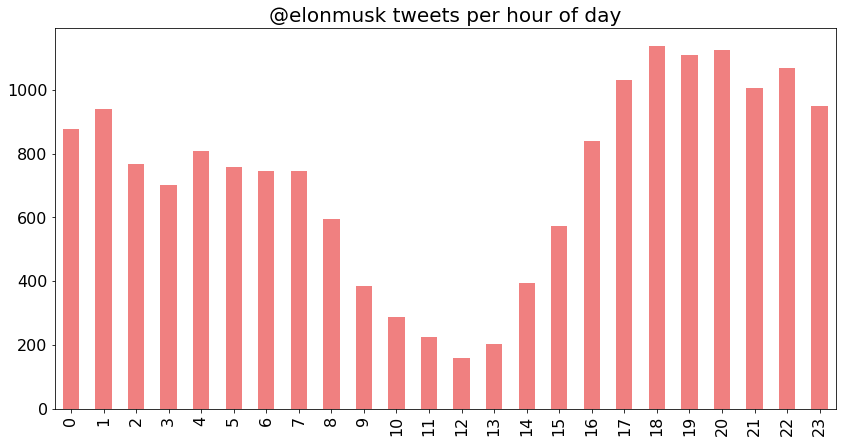

In [6]:
import datetime
(data.DateCreated
     .dt
     .hour
     .value_counts()
     .sort_index()
).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk tweets per hour of day', fontsize=20)

In [7]:
data["Tweets"].value_counts()

@BillyM2k 🤣                                                                                                                                                                                                            19
@nichegamer 🤣                                                                                                                                                                                                           6
@teslaownersSV Yes                                                                                                                                                                                                      6
@flcnhvy True                                                                                                                                                                                                           6
@engineers_feed 🤣                                                                                                               

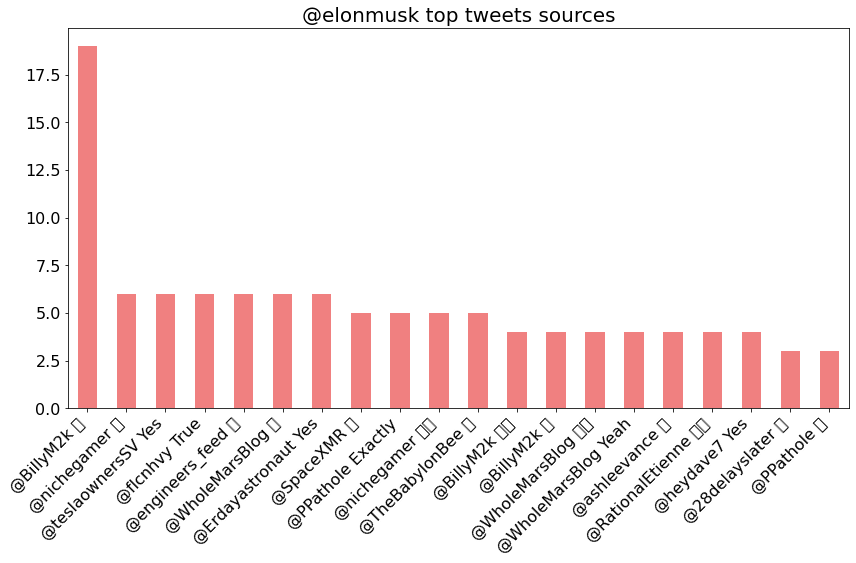

In [8]:
data['Tweets'].value_counts().head(20).plot.bar(
    figsize=(14, 7), fontsize=16, color='lightcoral'
)
plt.gca().set_title('@elonmusk top tweets sources', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=16)
pass

In [9]:
data["Source of Tweet"].value_counts()

Twitter for iPhone      16875
Twitter Web Client        402
Instagram                  93
Twitter Web App            36
Twitter for Websites       12
iOS                        11
Mobile Web                  4
Photos on iOS               3
Tweetlogix                  1
Name: Source of Tweet, dtype: int64

<AxesSubplot:title={'center':'Source of Tweet'}>

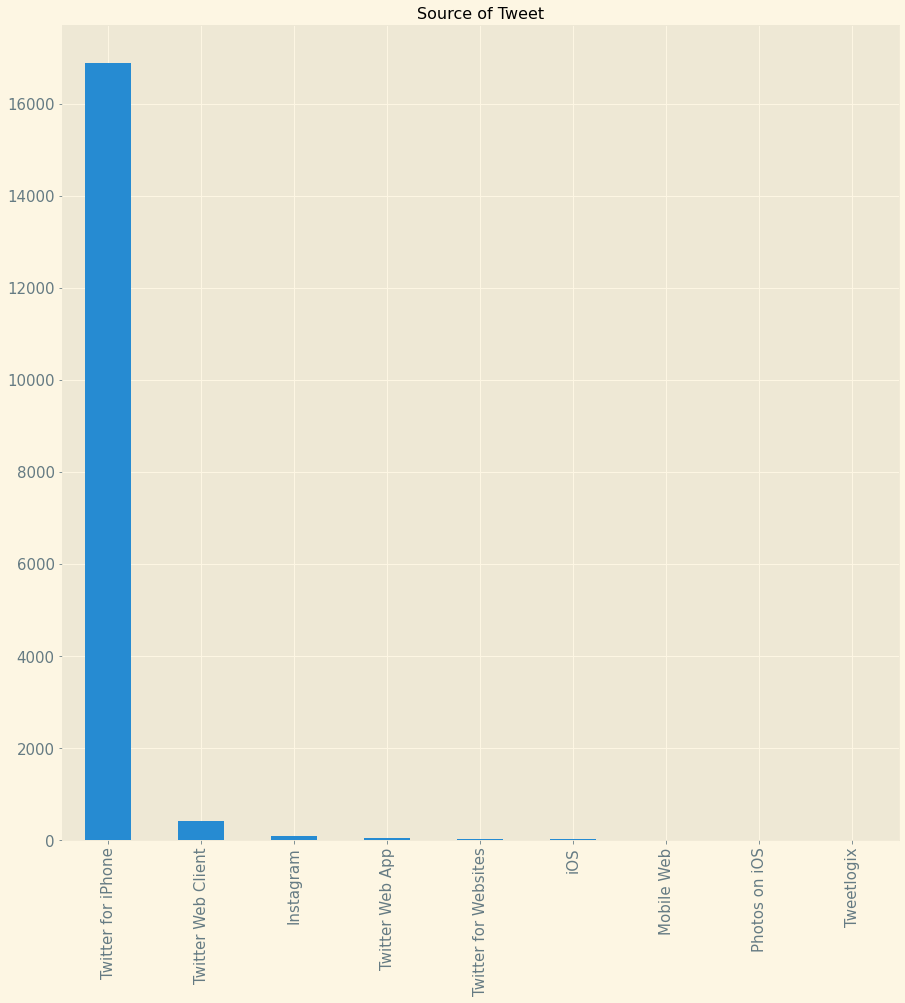

In [10]:
plt.style.use('Solarize_Light2')
data["Source of Tweet"].value_counts().plot(kind="bar",figsize=(15,15),title="Source of Tweet",fontsize=15)

In [11]:
data["Number of Likes"].value_counts()

5         19
6         19
4         18
7         17
630       12
          ..
29552      1
17650      1
15636      1
14462      1
112153     1
Name: Number of Likes, Length: 11376, dtype: int64

In [12]:
data1=data.sort_values(by = "Number of Likes", ascending = False)
data1.head(100)

,DateCreated,Number of Likes,Source of Tweet,Tweets
1602,2022-04-28 00:56:58+00:00,4812557,Twitter for iPhone,Next I’m buying Coca-Cola to put the cocaine b...
1627,2022-04-25 16:12:30+00:00,3259198,Twitter for iPhone,I hope that even my worst critics remain on Tw...
1599,2022-04-28 01:53:50+00:00,2673383,Twitter for iPhone,Let’s make Twitter maximum fun!
1626,2022-04-25 19:43:22+00:00,2629536,Twitter for iPhone,🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6
1598,2022-04-28 01:57:27+00:00,2600911,Twitter for iPhone,"Listen, I can’t do miracles ok https://t.co/z7..."
...,...,...,...,...
1428,2022-05-12 00:24:46+00:00,570501,Twitter for iPhone,Chronological tweets seem much better than wha...
5581,2021-01-21 23:08:35+00:00,568157,Twitter for iPhone,Am donating $100M towards a prize for best car...
5503,2021-01-29 08:22:15+00:00,567800,Twitter for iPhone,"In retrospect, it was inevitable"
182,2022-08-19 06:04:54+00:00,565587,Twitter for iPhone,Still so grateful 🥹 https://t.co/EhdyXw4fqN


In [13]:
#plt.style.use('Solarize_Light2')
#data1["Number of Likes"].value_counts().plot(kind="bar",figsize=(10,10),title="Number of Likes",fontsize=15)

In [14]:
dta = data.copy()

In [15]:
data = [Tweets.strip() for Tweets in data.Tweets]
# removes empty strings, because they are considered in Python as False
data = [Tweets for Tweets in data if Tweets]
data

['@teslaownersSV @cb_doge @Tesla @mayemusk I guess we could make Joe mode quieter',
 '@cb_doge @Tesla @mayemusk Still doing same thing, but bigger',
 'Looks good to roll out to all Tesla owners with 10.12.2 (~100k cars)!',
 '@Tesla__Mania @WholeMarsBlog That is probably the right order of magnitude',
 '@WholeMarsBlog Real-world validation &amp; billions of miles of real-world training are what will make FSD superhuman',
 '@Teslarati @JohnnaCrider1 Yup',
 '@cb_doge @paraga Sigh',
 'FSD Beta 10.69.2 rolling out now. Please note that top priority is safety, so expect it to be overly cautious, especially around pedestrians.',
 'Falcon arching to orbit https://t.co/m7grug8FV9',
 'No obvious limit to rocket reflight so far',
 '@Austen Instagram is an envy amplifier',
 '@DirtyTesLa @WholeMarsBlog Yes',
 '@WholeMarsBlog Team found a bug causing an 8% delay in detecting pedestrians at &gt;50m. That’s been fixed, so rolling out tonight.',
 '@EvaFoxU 🔥🤣',
 '@chicago_glenn @stevenmarkryan @WholeMa

In [16]:
data = pd.DataFrame(data, columns=['Tidy_Tweets'])
data


,Tidy_Tweets
0,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...
1,@cb_doge @Tesla @mayemusk Still doing same thi...
2,Looks good to roll out to all Tesla owners wit...
3,@Tesla__Mania @WholeMarsBlog That is probably ...
4,@WholeMarsBlog Real-world validation &amp; bil...
...,...
17432,That was a total non sequitur btw
17433,"Great Voltaire quote, arguably better than Twa..."
17434,I made the volume on the Model S http://t.co/w...
17435,Went to Iceland on Sat to ride bumper cars on ...


In [17]:
#Defining a dcitionary containing all the emojis and their meanings
emojis={':)':'smile',':-)':'smile',';d':'wink',':-E':'vampire',':(':'sad',
        ':-(':'sad',':-<':'sad',':P':'raspberry',':O':'surprised',
        ':-@':'shocked',':@':'shocked',':-$':'confused',':\\':'annoyed',
        ':#':'mute',':X':'mute',':^)':'smile',':-&':'confused','$_$':'greedy',
        '@@':'eyeroll',':-!':'confused',':-D':'smile',':-0':'yell','O.o':'confused',
        '<(-_-)>':'robot','d[-_-]b':'dj',":'-)":'sadsmile',';)':'wink',
        ';-)':'wink','O:-)':'angel','O*-)':'angel','(:-D':'gossip','=^.^=':'cat'}


In [18]:
# Joining the list into one string/text
#tweets_text =' '.join(data)
#tweets_text

In [19]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", str(text)) # Remove Mentions
    text = re.sub(r"#", "", str(text)) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", str(text)) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", str(text)) # Remove The Hyper Link
    text = re.sub("[\d]+", "", str(text)) #Removing the strings which contains unnecessary digits in data
    text = text.translate(str.maketrans('','',string.punctuation)) # Remove Punctuations
    text = re.sub("[\W]+", " ", str(text))   #Removing the strings which contains unnecessary digits in data
    text = re.sub('[%s]+' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
    text = re.sub('\W*\d\W*', '', text)
    text = re.sub('^ ', '', text)
    text = str.lower(text)
    for i in emojis.keys():
        text=text.replace(i,emojis[i])
    text=re.sub("\s+",' ',text)
    text=re.sub("\n",' ',text)
    letters=re.sub('[^a-zA-Z]',' ',text)
    return letters
    

In [20]:
data["Clean_Tweets"] = data["Tidy_Tweets"].apply(lambda x: cleantext(x))
data

,Tidy_Tweets,Clean_Tweets
0,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...,doge i guess we could make joe mode quieter
1,@cb_doge @Tesla @mayemusk Still doing same thi...,doge still doing same thing but bigger
2,Looks good to roll out to all Tesla owners wit...,looks good to roll out to all tesla owners wit...
3,@Tesla__Mania @WholeMarsBlog That is probably ...,mania that is probably the right order of magn...
4,@WholeMarsBlog Real-world validation &amp; bil...,realworld validation amp billions of miles of ...
...,...,...
17432,That was a total non sequitur btw,that was a total non sequitur btw
17433,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...
17434,I made the volume on the Model S http://t.co/w...,i made the volume on the model s go to now i j...
17435,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...


In [21]:
my_stop_words= stopwords.words('english')

sw_list = ['rt','ye','yeah','haha','Yes','x', 's', 'ð', 'pron', 'ufuf', 'amp']
my_stop_words.extend(sw_list)
cleaned_tweets = []

for index, row in data.iterrows():
    clean_data = [word for word in row.Clean_Tweets.split() if not word in my_stop_words]
    cleaned_tweets.append(' '.join(clean_data))

data['Fully_clean_tweet'] = cleaned_tweets
data

,Tidy_Tweets,Clean_Tweets,Fully_clean_tweet
0,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...,doge i guess we could make joe mode quieter,doge guess could make joe mode quieter
1,@cb_doge @Tesla @mayemusk Still doing same thi...,doge still doing same thing but bigger,doge still thing bigger
2,Looks good to roll out to all Tesla owners wit...,looks good to roll out to all tesla owners wit...,looks good roll tesla owners k cars
3,@Tesla__Mania @WholeMarsBlog That is probably ...,mania that is probably the right order of magn...,mania probably right order magnitude
4,@WholeMarsBlog Real-world validation &amp; bil...,realworld validation amp billions of miles of ...,realworld validation billions miles realworld ...
...,...,...,...
17432,That was a total non sequitur btw,that was a total non sequitur btw,total non sequitur btw
17433,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...,great voltaire quote arguably better twain hea...
17434,I made the volume on the Model S http://t.co/w...,i made the volume on the model s go to now i j...,made volume model go need work miniature stone...
17435,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...,went iceland sat ride bumper cars ice country ...


In [22]:
tknz_twt = data['Fully_clean_tweet'].apply(lambda x: x.split())
tknz_twt

0           [doge, guess, could, make, joe, mode, quieter]
1                             [doge, still, thing, bigger]
2              [looks, good, roll, tesla, owners, k, cars]
3               [mania, probably, right, order, magnitude]
4        [realworld, validation, billions, miles, realw...
                               ...                        
17432                          [total, non, sequitur, btw]
17433    [great, voltaire, quote, arguably, better, twa...
17434    [made, volume, model, go, need, work, miniatur...
17435    [went, iceland, sat, ride, bumper, cars, ice, ...
17436    [please, ignore, prior, tweets, someone, prete...
Name: Fully_clean_tweet, Length: 17437, dtype: object

In [23]:
word_lemmatizer = WordNetLemmatizer()

tknz_twt = tknz_twt.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

tknz_twt

0           [doge, guess, could, make, joe, mode, quieter]
1                             [doge, still, thing, bigger]
2                 [look, good, roll, tesla, owner, k, car]
3               [mania, probably, right, order, magnitude]
4        [realworld, validation, billion, mile, realwor...
                               ...                        
17432                          [total, non, sequitur, btw]
17433    [great, voltaire, quote, arguably, better, twa...
17434    [made, volume, model, go, need, work, miniatur...
17435    [went, iceland, sat, ride, bumper, car, ice, c...
17436    [please, ignore, prior, tweet, someone, preten...
Name: Fully_clean_tweet, Length: 17437, dtype: object

In [24]:
for i, tokens in enumerate(tknz_twt):
    tknz_twt[i] = ' '.join(tokens)

data['Fully_clean_tweet'] = tknz_twt
data

,Tidy_Tweets,Clean_Tweets,Fully_clean_tweet
0,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...,doge i guess we could make joe mode quieter,doge guess could make joe mode quieter
1,@cb_doge @Tesla @mayemusk Still doing same thi...,doge still doing same thing but bigger,doge still thing bigger
2,Looks good to roll out to all Tesla owners wit...,looks good to roll out to all tesla owners wit...,look good roll tesla owner k car
3,@Tesla__Mania @WholeMarsBlog That is probably ...,mania that is probably the right order of magn...,mania probably right order magnitude
4,@WholeMarsBlog Real-world validation &amp; bil...,realworld validation amp billions of miles of ...,realworld validation billion mile realworld tr...
...,...,...,...
17432,That was a total non sequitur btw,that was a total non sequitur btw,total non sequitur btw
17433,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...,great voltaire quote arguably better twain hea...
17434,I made the volume on the Model S http://t.co/w...,i made the volume on the model s go to now i j...,made volume model go need work miniature stone...
17435,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...,went iceland sat ride bumper car ice country v...


In [25]:
def fetch_sentiment_using_SIA(Tweets):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(Tweets)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'


In [27]:
sentiments_using_SIA = data.Fully_clean_tweet.apply(lambda Tweets: fetch_sentiment_using_SIA(Tweets))

pd.DataFrame(sentiments_using_SIA.value_counts())

,Fully_clean_tweet
pos,15204
neg,2233


In [28]:
data.Clean_Tweets[3]

'mania that is probably the right order of magnitude'

In [29]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data.Fully_clean_tweet[3])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [30]:
df = pd.DataFrame()
df['Tweets'] = data.Fully_clean_tweet
df['scores'] = data['Clean_Tweets'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Tweets,scores
0,doge guess could make joe mode quieter,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,doge still thing bigger,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,look good roll tesla owner k car,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp..."
3,mania probably right order magnitude,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,realworld validation billion mile realworld tr...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [31]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Tweets,scores,compound
0,doge guess could make joe mode quieter,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,doge still thing bigger,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,look good roll tesla owner k car,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.4404
3,mania probably right order magnitude,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,realworld validation billion mile realworld tr...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [32]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Tweets,scores,compound,sentiment
0,doge guess could make joe mode quieter,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,doge still thing bigger,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,look good roll tesla owner k car,"{'neg': 0.0, 'neu': 0.775, 'pos': 0.225, 'comp...",0.4404,Positive
3,mania probably right order magnitude,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
4,realworld validation billion mile realworld tr...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
...,...,...,...,...
17432,total non sequitur btw,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
17433,great voltaire quote arguably better twain hea...,"{'neg': 0.186, 'neu': 0.505, 'pos': 0.309, 'co...",0.5994,Positive
17434,made volume model go need work miniature stone...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
17435,went iceland sat ride bumper car ice country v...,"{'neg': 0.074, 'neu': 0.676, 'pos': 0.25, 'com...",0.7351,Positive


In [33]:
temp = df.groupby('sentiment').count()['Tweets'].reset_index().sort_values(by='Tweets',ascending=False)
temp

,sentiment,Tweets
2,Positive,7988
1,Neutral,7019
0,Negative,2430


In [34]:
data['Sentiment'] = sentiments_using_SIA
data

,Tidy_Tweets,Clean_Tweets,Fully_clean_tweet,Sentiment
0,@teslaownersSV @cb_doge @Tesla @mayemusk I gue...,doge i guess we could make joe mode quieter,doge guess could make joe mode quieter,pos
1,@cb_doge @Tesla @mayemusk Still doing same thi...,doge still doing same thing but bigger,doge still thing bigger,pos
2,Looks good to roll out to all Tesla owners wit...,looks good to roll out to all tesla owners wit...,look good roll tesla owner k car,pos
3,@Tesla__Mania @WholeMarsBlog That is probably ...,mania that is probably the right order of magn...,mania probably right order magnitude,pos
4,@WholeMarsBlog Real-world validation &amp; bil...,realworld validation amp billions of miles of ...,realworld validation billion mile realworld tr...,pos
...,...,...,...,...
17432,That was a total non sequitur btw,that was a total non sequitur btw,total non sequitur btw,pos
17433,"Great Voltaire quote, arguably better than Twa...",great voltaire quote arguably better than twai...,great voltaire quote arguably better twain hea...,pos
17434,I made the volume on the Model S http://t.co/w...,i made the volume on the model s go to now i j...,made volume model go need work miniature stone...,pos
17435,Went to Iceland on Sat to ride bumper cars on ...,went to iceland on sat to ride bumper cars on ...,went iceland sat ride bumper car ice country v...,pos


In [35]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

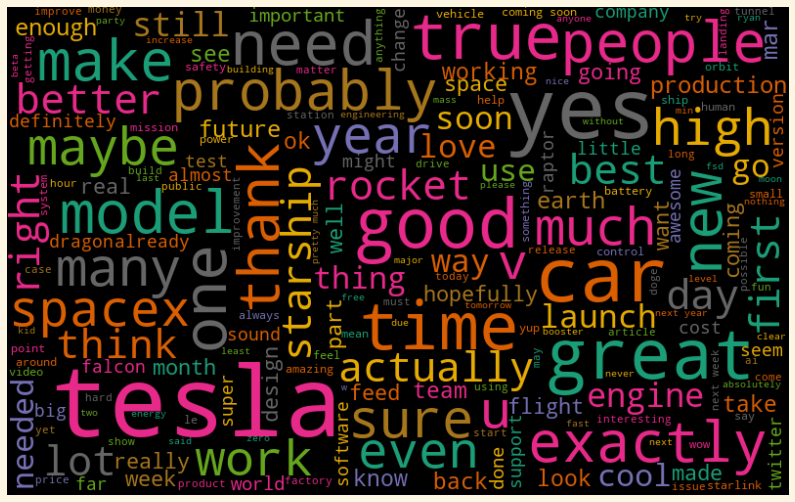

In [36]:
all_words = ' '.join([text for text in data['Fully_clean_tweet'][data.Sentiment == 'pos']])
generate_wordcloud(all_words)

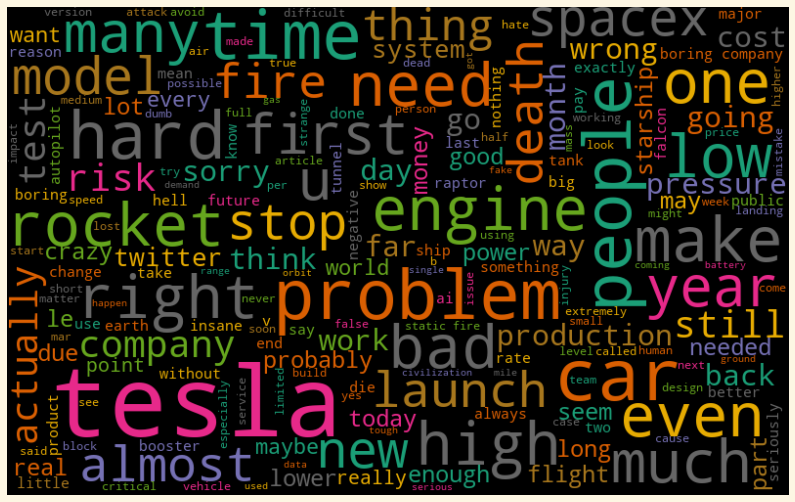

In [37]:
all_words = ' '.join([text for text in data['Fully_clean_tweet'][data.Sentiment == 'neg']])
generate_wordcloud(all_words)

In [38]:
#data['Sentiment'].index
data['Sentiment'].info

<bound method Series.info of 0        pos
1        pos
2        pos
3        pos
4        pos
        ... 
17432    pos
17433    pos
17434    pos
17435    pos
17436    pos
Name: Sentiment, Length: 17437, dtype: object>

In [39]:
# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(data['Fully_clean_tweet'])

In [40]:
target_variable = data['Sentiment'].apply(lambda x: 1 if x=='pos' else 0)
target_variable.value_counts()

1    15204
0     2233
Name: Sentiment, dtype: int64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=0, stratify=target_variable)
nb = MultinomialNB()
model = nb.fit(X_train, y_train)

In [42]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8767201834862385

In [43]:
confusion_matrix(y_test, y_pred)

array([[  26,  644],
       [   1, 4561]], dtype=int64)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.04      0.07       670
           1       0.88      1.00      0.93      4562

    accuracy                           0.88      5232
   macro avg       0.92      0.52      0.50      5232
weighted avg       0.89      0.88      0.82      5232



In [45]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [46]:
y_pred = model1.predict(X_test)
accuracy_score(y_test, y_pred)

0.8635321100917431

In [47]:
confusion_matrix(y_test, y_pred)

array([[ 237,  433],
       [ 281, 4281]], dtype=int64)

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.35      0.40       670
           1       0.91      0.94      0.92      4562

    accuracy                           0.86      5232
   macro avg       0.68      0.65      0.66      5232
weighted avg       0.85      0.86      0.86      5232



In [62]:
import gzip
import dill
#write the trained model into dill file
with gzip.open('model.dill.gz', 'wb') as f:
    dill.dump(model, f, recurse=True)
#read the trained model from the dill file
with gzip.open('model.dill.gz', 'rb') as f:
    model = dill.load(f)
#testing to check whether the trained model is stored
accuracy_score(y_test, y_pred)

0.8635321100917431

In [52]:
''''import pickle
pickle.dump(model,open("model.pkl","wb"))
pickle.dump(my_stop_words,open("stop.pkl","wb"))
pickle.dump(tfidf_word_vectorizer,open("vectorizer.pkl","wb"))'''''

In [53]:
''''model=pickle.load(open('model.pkl','rb'))
model=pickle.load(open('stop.pkl','rb'))
model=pickle.load(open("vectorizer.pkl",'rb'))''''''

In [54]:
''''import joblib
joblib.dump(my_stop_words,"C:\\Users\\NAVEEN REDDY\\stop.pkl") 
joblib.dump(model,"C:\\Users\\NAVEEN REDDY\\model.pkl")
joblib.dump(tfidf_word_vectorizer,"C:\\Users\\NAVEEN REDDY\\vectorizer.pkl")'''

['C:\\Users\\NAVEEN REDDY\\vectorizer.pkl']

In [57]:
!pip install dill